In [1]:
from customFunctions import readSavedData
import pandas as pd
import numpy as np
import yaml
import csv
import seaborn as sns

In [2]:
with open('../Notebooks/preprocessingConfig.yml', 'r') as file:
    config = yaml.safe_load(file)

In [3]:
filename = config['general']['saved_file']

In [4]:
df = pd.read_csv('../Data/Private.csv',
                 # index_col=False,
                )

In [5]:
df17 = pd.read_csv("../Data/PrivateAdmissions20172018.csv",
                  )

In [6]:
# Sort by Total weight
df.sort_values(by=['TOTAL WEIGHT'],
                    ignore_index=True,
                    ascending=True,
                    kind='mergesort',
                   )
# Get School index
def getSchoolIndex(StudentIndex):
    schoolIndex = StudentIndex[:5]
    return schoolIndex

# Get admissions by District
def getAdmissionsByDistrict(df, district):
    district = district.upper()
    df = df[df.DISTRICT == district]
    return df

def getAdmissionsByProgramCode(df, code):
    code = code.upper()
    df = df[df['COURSE CODE'] == code]
    return df

def getAdmissionsBySchoolIndex(df, schoolIndex):
    schoolIndex = schoolIndex.upper()
    df = df[df['SCHOOL INDEX'] == schoolIndex]
    return df

In [7]:
df.drop(columns=['NAME', 'INDEX NO'])

,APPLICATION NO,GENDER,UACE YEAR,CODE,DISTRICT,COURSE CODE,COURSE NAME,TOTAL WEIGHT
0,23APF412304454141015,M,2022.0,42.0,MUKONO,ACC,BSC. Accounting (EVE),42.2
1,23APF345674424112360,M,2022.0,40.0,MPIGI,ACC,BSC. Accounting (EVE),41.1
2,23APF1361730063122187,F,2022.0,21.0,KASESE,ACC,BSC. Accounting (EVE),40.6
3,23APF519647933132646,F,2022.0,33.0,MASAKA,ACC,BSC. Accounting (EVE),38.8
4,23APF1481620160129238,F,2022.0,65.0,IBANDA,ACC,BSC. Accounting (EVE),38.4
...,...,...,...,...,...,...,...,...
14910,23APF727648568141557,F,2022.0,17.0,KAMULI,VET,B. Veterinary Medicine,41.8
14911,23APF963075058135059,M,2022.0,31.0,LIRA,VET,B. Veterinary Medicine,41.7
14912,23APF1618205309130850,F,2022.0,74.0,MARACHA,VET,B. Veterinary Medicine,41.6
14913,23APF575513287117711,F,2022.0,31.0,LIRA,VET,B. Veterinary Medicine,40.4


In [8]:
df

,APPLICATION NO,INDEX NO,NAME,GENDER,UACE YEAR,CODE,DISTRICT,COURSE CODE,COURSE NAME,TOTAL WEIGHT
0,23APF412304454141015,U0391/673,LUKABWE DOUGLAS MARK,M,2022.0,42.0,MUKONO,ACC,BSC. Accounting (EVE),42.2
1,23APF345674424112360,U1249/532,LULE ISAAC,M,2022.0,40.0,MPIGI,ACC,BSC. Accounting (EVE),41.1
2,23APF1361730063122187,U0459/676,HAULAH SULAIT BIIRA,F,2022.0,21.0,KASESE,ACC,BSC. Accounting (EVE),40.6
3,23APF519647933132646,U1611/887,NAMBALYE EVELYNE,F,2022.0,33.0,MASAKA,ACC,BSC. Accounting (EVE),38.8
4,23APF1481620160129238,U0083/555,KEMIGISHA RUSIA,F,2022.0,65.0,IBANDA,ACC,BSC. Accounting (EVE),38.4
...,...,...,...,...,...,...,...,...,...,...
14910,23APF727648568141557,U0017/548,KIZZA VANESSA ITRONCE,F,2022.0,17.0,KAMULI,VET,B. Veterinary Medicine,41.8
14911,23APF963075058135059,U0033/581,OTIM DANIEL,M,2022.0,31.0,LIRA,VET,B. Veterinary Medicine,41.7
14912,23APF1618205309130850,U0077/736,MUKETI JOVIA,F,2022.0,74.0,MARACHA,VET,B. Veterinary Medicine,41.6
14913,23APF575513287117711,U0077/564,AWOR REBECCA,F,2022.0,31.0,LIRA,VET,B. Veterinary Medicine,40.4


In [9]:
# sort by course
df.sort_values(by=['COURSE CODE'],
               kind='mergesort',
               ascending=True,
               ignore_index=True,
              ).head(50)

,APPLICATION NO,INDEX NO,NAME,GENDER,UACE YEAR,CODE,DISTRICT,COURSE CODE,COURSE NAME,TOTAL WEIGHT
0,23APF412304454141015,U0391/673,LUKABWE DOUGLAS MARK,M,2022.0,42.0,MUKONO,ACC,BSC. Accounting (EVE),42.2
1,23APF345674424112360,U1249/532,LULE ISAAC,M,2022.0,40.0,MPIGI,ACC,BSC. Accounting (EVE),41.1
2,23APF1361730063122187,U0459/676,HAULAH SULAIT BIIRA,F,2022.0,21.0,KASESE,ACC,BSC. Accounting (EVE),40.6
3,23APF519647933132646,U1611/887,NAMBALYE EVELYNE,F,2022.0,33.0,MASAKA,ACC,BSC. Accounting (EVE),38.8
4,23APF1481620160129238,U0083/555,KEMIGISHA RUSIA,F,2022.0,65.0,IBANDA,ACC,BSC. Accounting (EVE),38.4
5,23APF1501202078128326,U2373/501,LUWAGA TONNY,M,2018.0,55.0,WAKISO,ACC,BSC. Accounting (EVE),38.4
6,23APF1139056282132364,U0856/511,NAMAGEMBE MARTINA,F,2022.0,25.0,KIBOGA,ACC,BSC. Accounting (EVE),38.2
7,23APF101396019107326,U2929/521,KALUNGI TITUS,M,2022.0,75.0,MITYANA,ACC,BSC. Accounting (EVE),38.1
8,23APF515017899120808,U1609/550,KIZITO PATRICK,M,2011.0,16.0,KAMPALA,ACC,BSC. Accounting (EVE),37.9
9,23APF1672224247102423,U1224/882,NDYOMUHIRWA CHRISTIAN,M,2022.0,50.0,RUKUNGIRI,ACC,BSC. Accounting (EVE),37.9


In [10]:
df17SchoolIndices = df17['INDEX NO'].apply(getSchoolIndex)

In [11]:
indices = df17SchoolIndices.tolist()

In [12]:
schools = df17['SCHOOL'].tolist()

In [13]:
schoolsDf = pd.DataFrame([],
                          columns=['School Index', 'School Name'],
)

In [14]:
schoolsDf['School Index'] = indices

In [15]:
schoolsDf['School Name'] = schools

In [16]:
schoolsDf = schoolsDf.drop_duplicates(['School Index'])

In [17]:
schoolsDf = schoolsDf.sort_values(by='School Index', ascending=True, ignore_index=True)

In [18]:
schoolsDf = schoolsDf[schoolsDf['School Index'] != 'NO']

In [19]:
schoolDict = {schoolsDf['School Index'].tolist()[x]:schoolsDf['School Name'].tolist()[x] for x in range(len(schoolsDf))}

In [20]:
# schoolDict

In [21]:
# Add school index to df
df.insert(1, "SCHOOL INDEX", df['INDEX NO'].apply(getSchoolIndex))

In [22]:
# Students from a school with School Index U0078'. This is Iganga High School: U0078, 
df[df['SCHOOL INDEX'] == 'U0017'].sort_values(by="TOTAL WEIGHT", ascending=False)

,APPLICATION NO,SCHOOL INDEX,INDEX NO,NAME,GENDER,UACE YEAR,CODE,DISTRICT,COURSE CODE,COURSE NAME,TOTAL WEIGHT
14119,23APF1431768274140888,U0017,U0017/637,IKIRING PATRICIA,F,2022.0,29.0,KUMI,SOW,BACHELOR OF SOCIAL WORK,49.6
14137,23APF59554089107243,U0017,U0017/546,KIRABO DENIZ,F,2022.0,4.0,BUGIRI,SQS,BSC Quantity Surveying,48.8
3866,23APF950938163143107,U0017,U0017/678,WANGUBO MAIMUNA MUTESI,F,2022.0,55.0,WAKISO,BCA,BACHELOR OF CHINESE & ASIAN STUDIES,48.4
12447,23APF235352693145115,U0017,U0017/654,NABIRYE RESTY TINAH,F,2022.0,100.0,LUUKA,IST,B. INFORMATION SYSTEMS & TECHNOLOGY,47.2
3867,23APF1430543958148268,U0017,U0017/620,AKULLU SARAH,F,2022.0,76.0,OYAM,BCA,BACHELOR OF CHINESE & ASIAN STUDIES,47.2
...,...,...,...,...,...,...,...,...,...,...,...
5932,23APF383732361142513,U0017,U0017/584,NAMAGANDA PERSIS SARAH,F,2022.0,79.0,NAMUTUMBA,BJS,"BSC. ACCOUNTING, JINJA (DAY)",22.6
10018,23APF66985098145287,U0017,U0017/624,AMULEN CYNTHIA,F,2022.0,67.0,BUKEDEA,COB,B. COMMERCE (EVE),18.2
5904,23APF246648230138606,U0017,U0017/670,NANTAMBI VICTORIA,F,2022.0,4.0,BUGIRI,BJO,"B. COMMERCE, JINJA (DAY)",17.7
10039,23APF7902698130457,U0017,U0017/676,WAMBUYA ESTHER CARO,F,2022.0,36.0,MBALE,COB,B. COMMERCE (EVE),16.5


In [23]:
df['SCHOOL'] = df['SCHOOL INDEX'].map(schoolDict)

In [24]:
df.to_csv('../Data/Private2022.csv',
          index=False,
         )

In [25]:
df2 = pd.read_csv('../Data/Private2022.csv', 
                  # index_col=False,
                 )

In [26]:
df2

,APPLICATION NO,SCHOOL INDEX,INDEX NO,NAME,GENDER,UACE YEAR,CODE,DISTRICT,COURSE CODE,COURSE NAME,TOTAL WEIGHT,SCHOOL
0,23APF412304454141015,U0391,U0391/673,LUKABWE DOUGLAS MARK,M,2022.0,42.0,MUKONO,ACC,BSC. Accounting (EVE),42.2,"ST.JOSEPH'S S S, NAGGALAMA"
1,23APF345674424112360,U1249,U1249/532,LULE ISAAC,M,2022.0,40.0,MPIGI,ACC,BSC. Accounting (EVE),41.1,KINAAWA HIGH SCHOOL
2,23APF1361730063122187,U0459,U0459/676,HAULAH SULAIT BIIRA,F,2022.0,21.0,KASESE,ACC,BSC. Accounting (EVE),40.6,KAWEMPE MUSLIM SS
3,23APF519647933132646,U1611,U1611/887,NAMBALYE EVELYNE,F,2022.0,33.0,MASAKA,ACC,BSC. Accounting (EVE),38.8,OURLADY OF AFRICA SS NAMILYANGO
4,23APF1481620160129238,U0083,U0083/555,KEMIGISHA RUSIA,F,2022.0,65.0,IBANDA,ACC,BSC. Accounting (EVE),38.4,IMMACULATE HEART GIRLS SCHOOL
...,...,...,...,...,...,...,...,...,...,...,...,...
14910,23APF727648568141557,U0017,U0017/548,KIZZA VANESSA ITRONCE,F,2022.0,17.0,KAMULI,VET,B. Veterinary Medicine,41.8,IGANGA SECONDARY SCHOOL
14911,23APF963075058135059,U0033,U0033/581,OTIM DANIEL,M,2022.0,31.0,LIRA,VET,B. Veterinary Medicine,41.7,"ST MARY'S COLLEGE, KISUBI"
14912,23APF1618205309130850,U0077,U0077/736,MUKETI JOVIA,F,2022.0,74.0,MARACHA,VET,B. Veterinary Medicine,41.6,GOMBE SECONDARY SCHOOL
14913,23APF575513287117711,U0077,U0077/564,AWOR REBECCA,F,2022.0,31.0,LIRA,VET,B. Veterinary Medicine,40.4,GOMBE SECONDARY SCHOOL


In [27]:
# No duplicates
df[df["APPLICATION NO"].duplicated()].value_counts()

APPLICATION NO        SCHOOL INDEX  INDEX NO   NAME            GENDER  UACE YEAR  CODE  DISTRICT  COURSE CODE  COURSE NAME                TOTAL WEIGHT  SCHOOL                  
23APF992513978128612  U0178         U0178/548  NAHWERA DOREEN  F       2022.0     18.0  KAMWENGE  LIS          B.Library & Infor.Science  29.2          CALTEC ACADEMY, MAKERERE    1
Name: count, dtype: int64

In [28]:
# Students admitted to two courses
df[df['INDEX NO'] == 'U0178/548']

,APPLICATION NO,SCHOOL INDEX,INDEX NO,NAME,GENDER,UACE YEAR,CODE,DISTRICT,COURSE CODE,COURSE NAME,TOTAL WEIGHT,SCHOOL
11743,23APF992513978128612,U0178,U0178/548,NAHWERA DOREEN,F,2022.0,18.0,KAMWENGE,EDA,Bachelor of Arts with Education,29.2,"CALTEC ACADEMY, MAKERERE"
12766,23APF992513978128612,U0178,U0178/548,NAHWERA DOREEN,F,2022.0,18.0,KAMWENGE,LIS,B.Library & Infor.Science,29.2,"CALTEC ACADEMY, MAKERERE"


In [29]:
# Describe data 
df.describe()

,UACE YEAR,CODE,TOTAL WEIGHT
count,14915.000000,14915.000000,14915.000000
mean,2021.574187,46.417499,31.401495
std,1.911034,30.508257,7.820673
min,1995.000000,1.000000,8.900000
25%,2022.000000,18.000000,25.700000
50%,2022.000000,42.000000,31.300000
75%,2022.000000,65.000000,37.100000
max,2022.000000,123.000000,53.900000


In [30]:
dfdesc = df.describe()

In [31]:
AverageWt = dfdesc.loc['mean']['TOTAL WEIGHT']

In [32]:
AverageWt

31.40149513912169

In [33]:
# Admissions with min UACE year
df[df['UACE YEAR'] == df['UACE YEAR'].min()]

,APPLICATION NO,SCHOOL INDEX,INDEX NO,NAME,GENDER,UACE YEAR,CODE,DISTRICT,COURSE CODE,COURSE NAME,TOTAL WEIGHT,SCHOOL
1916,23APF1071633136149141,U0055,U0055/582,KIYEMBA HENRY,M,1995.0,42.0,MUKONO,BBA,Bachelor of Business Administration (EVE),25.9,"BISHOP'S SEC. SCHOOL, MUKONO"
12650,23APF5536474177057,U0212,U0212/870,NABULINDO JANE KWOBA,F,1995.0,7.0,BUSIA,LGM,B.Leadership and Governance (EVE),17.4,NaN


In [34]:
# Unique admission years
df['UACE YEAR'].unique()

array([2022., 2018., 2011., 2009., 2017., 2007., 2020., 2013., 2019.,
       2015., 2016., 2008., 2012., 2010., 2003., 2014., 2006., 1996.,
       2005., 2004., 2000., 1995., 2002., 2001., 1999.])

In [35]:
# df['DISTRICT'].unique()

In [36]:
# df['COURSE CODE'].unique().tolist()

In [37]:
getAdmissionsByProgramCode(df, 'VET')

,APPLICATION NO,SCHOOL INDEX,INDEX NO,NAME,GENDER,UACE YEAR,CODE,DISTRICT,COURSE CODE,COURSE NAME,TOTAL WEIGHT,SCHOOL
14895,23APF1147751099122058,U0063,U0063/583,NABUKENYA THERESA VANESSA,F,2022.0,33.0,MASAKA,VET,B. Veterinary Medicine,45.4,"MT.ST.MARY'S, NAMAGUNGA"
14896,23APF1325116248147470,U1354,U1354/532,BYAMUGISHA NICKSON,M,2022.0,117.0,RUBANDA,VET,B. Veterinary Medicine,45.0,MERRYLAND HIGH SCHOOL
14897,23APF488606566118285,U1224,U1224/581,ATEGEKA AFRICANO,M,2022.0,102.0,KAGADI,VET,B. Veterinary Medicine,44.8,ST MARY'S SS KITENDE
14898,23APF1087150200123994,U2119,U2119/501,SSEKANDI RAYMOND,M,2022.0,16.0,KAMPALA,VET,B. Veterinary Medicine,43.9,MPIGI MIXED SS
14899,23APF1019459175137320,U1224,U1224/886,NSIBIRWA BRIAN,M,2022.0,42.0,MUKONO,VET,B. Veterinary Medicine,43.8,ST MARY'S SS KITENDE
14900,23APF9434575553922,U0391,U0391/521,ODORA JOEREM,M,2022.0,114.0,AGAGO,VET,B. Veterinary Medicine,43.8,"ST.JOSEPH'S S S, NAGGALAMA"
14901,23APF1498096283111835,U3859,U3859/592,ATYANG JONATHAN JOHNSON,M,2022.0,31.0,LIRA,VET,B. Veterinary Medicine,43.7,NaN
14902,23APF947574098101599,U0391,U0391/531,JJUUKO TIMOTHY,M,2022.0,85.0,BUIKWE,VET,B. Veterinary Medicine,43.7,"ST.JOSEPH'S S S, NAGGALAMA"
14903,23APF862949047142562,U0169,U0169/625,SSEBAKA EDWARD,M,2022.0,97.0,KYANKWANZI,VET,B. Veterinary Medicine,43.7,"ST.ANDREA KAHWA'S COL., HOIMA"
14904,23APF483949345129848,U2236,U2236/521,MUWUMBA SAVIOUR,M,2022.0,85.0,BUIKWE,VET,B. Veterinary Medicine,43.6,"ST.MARY'S COLLEGE, LUGAZI"


In [38]:
getAdmissionsBySchoolIndex(df, 'U3859')

,APPLICATION NO,SCHOOL INDEX,INDEX NO,NAME,GENDER,UACE YEAR,CODE,DISTRICT,COURSE CODE,COURSE NAME,TOTAL WEIGHT,SCHOOL
942,23APF343295604122013,U3859,U3859/516,ACUMA JOSHUA,M,2022.0,31.0,LIRA,ASE,BA(Social Sciences)(EVE),36.4,NaN
974,23APF612783863120559,U3859,U3859/572,APILI PRISCILLA,F,2022.0,31.0,LIRA,ASE,BA(Social Sciences)(EVE),34.1,NaN
1008,23APF1600535019132063,U3859,U3859/580,APIO RITAH EDWOKU,F,2022.0,31.0,LIRA,ASE,BA(Social Sciences)(EVE),33.1,NaN
1477,23APF10743472131403,U3859,U3859/692,OKIDI JENKINS OTOKE,M,2022.0,58.0,ABIM,BAP,B. Animal Produ.Techn Mgt,21.3,NaN
3215,23APF828713224108164,U3859,U3859/700,OKWIR DOMINIC ONGEBO,M,2022.0,59.0,AMOLATAR,BBD,Bachelor of Business Administration,28.8,NaN
3830,23APF1054721195117032,U3859,U3859/508,ACENG RUTH GODWIN,F,2022.0,31.0,LIRA,BBT,Bachelor of Science in Biotechnology,34.7,NaN
3877,23APF816217866122551,U3859,U3859/507,ACENG PRISCA,F,2022.0,31.0,LIRA,BCA,BACHELOR OF CHINESE & ASIAN STUDIES,35.1,NaN
3935,23APF538284813130401,U3859,U3859/665,OGWAL INNOCENT,M,2022.0,2.0,APAC,BCB,BSC (Conservation Biology),17.8,NaN
4324,23APF549406059120196,U3859,U3859/683,OKELLO ISAAC ABRAHAM,M,2022.0,95.0,KOLE,BEN,Bachelor of Entrepreneurship,34.7,NaN
4451,23APF199232021102912,U3859,U3859/503,ABEJA FIONA OGWAL,F,2022.0,31.0,LIRA,BEN,Bachelor of Entrepreneurship,23.9,NaN


In [39]:
df_copy = df.copy()

In [40]:
df.loc[df['SCHOOL INDEX'] == 'U3859', 'SCHOOL'] = 'St. Gracious S.S LIRA'

In [41]:
# Get admissions by District
getAdmissionsByDistrict(df, 'iganga').sort_values(by='TOTAL WEIGHT', ascending=False)

,APPLICATION NO,SCHOOL INDEX,INDEX NO,NAME,GENDER,UACE YEAR,CODE,DISTRICT,COURSE CODE,COURSE NAME,TOTAL WEIGHT,SCHOOL
8404,23APF871087435114146,U0013,U0013/526,MIREMBE PRICEY SAMANTHA,F,2022.0,10.0,IGANGA,BSW,B.SC.(Software Engineering),48.5,GAYAZA HIGH SCHOOL
14145,23APF366753009141449,U0061,U0061/551,MUTESI JAMILLAH,F,2022.0,10.0,IGANGA,SQS,BSC Quantity Surveying,47.6,NABISUNSA GIRLS' SCHOOL
6947,23APF1103539225137561,U0124,U0124/560,SAJJABI ALEX,M,2022.0,10.0,IGANGA,BPG,BSC (Petroleum Geoscience and Production),47.2,BUDINI SECONDARY SCHOOL
10248,23APF1420692019149215,U0017,U0017/560,MUGAYA MARIA,F,2022.0,10.0,IGANGA,COM,Bachelor of Commerce,45.7,IGANGA SECONDARY SCHOOL
11317,23APF1193981484140507,U1698,U1698/501,TIKIBONEKA MARIAM,F,2022.0,10.0,IGANGA,EDA,Bachelor of Arts with Education,44.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
909,23APF584897429150243,U0183,U0183/575,NANDHEGO REBECCA,F,2022.0,10.0,IGANGA,ARS,BA (Arts),15.8,UGANDA MARTYRS'HIGH SC. RUBAGA
9410,23APF1413249701119183,U0896,U0896/961,KWAGALA FAITH,F,2022.0,10.0,IGANGA,BUS,B.Business Statistics,15.2,"ST.PETER'S SS, NAALYA"
2418,23APF54906142677348,U1602,U1602/526,TAMUZADE MUDASIRU,M,2016.0,10.0,IGANGA,BBA,Bachelor of Business Administration (EVE),14.5,NaN
1640,23APF1351200345134434,U3738,U3738/537,MENYA FAHADI,M,2022.0,10.0,IGANGA,BAX,B. AGRICULTURAL & RURAL INNOVATION (EXTERNAL),14.3,NaN


In [42]:
df[df['SCHOOL'].isna() == True]

,APPLICATION NO,SCHOOL INDEX,INDEX NO,NAME,GENDER,UACE YEAR,CODE,DISTRICT,COURSE CODE,COURSE NAME,TOTAL WEIGHT,SCHOOL
14,23APF231927019128941,U0960,U0960/506,LUUTU DOUGLAS,M,2022.0,16.0,KAMPALA,ACC,BSC. Accounting (EVE),35.8,NaN
17,23APF1031507983139846,U3219,U3219/507,NANDAGIRE SCOVIA,F,2022.0,49.0,RAKAI,ACC,BSC. Accounting (EVE),34.6,NaN
32,23APF724414868141141,U3219,U3219/508,NAMBAYO KATHY,F,2022.0,77.0,BUDAKA,ACC,BSC. Accounting (EVE),31.3,NaN
33,23APF1413319323135980,U1969,U1969/524,KAKOOZA MOHMMAD,M,2022.0,88.0,BUTAMBALA,ACC,BSC. Accounting (EVE),31.2,NaN
38,23APF269087811114307,U3941,U3941/514,LUKYAMUZI JUDE THADDEUS,M,2022.0,33.0,MASAKA,ACC,BSC. Accounting (EVE),31.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14884,23APF1135184133134407,U3374,U3374/528,OCHOM BRIAN,M,2022.0,54.0,TORORO,TTM,B.Travel and Tourism Management (EVE),18.5,NaN
14886,23APF35679080123129,U0157,U0157/599,NYAKATO PRINCESS,F,2022.0,46.0,NTUNGAMO,TTM,B.Travel and Tourism Management (EVE),18.3,NaN
14887,23APF717262298129715,U1988,U1988/501,ATWINE SHEILLA,F,2022.0,50.0,RUKUNGIRI,TTM,B.Travel and Tourism Management (EVE),18.3,NaN
14888,23APF1422105617141114,U4099,U4099/513,KIWALABYE COLLIN,M,2022.0,75.0,MITYANA,TTM,B.Travel and Tourism Management (EVE),18.0,NaN


In [43]:
df.sort_values(by=['TOTAL WEIGHT'], ascending=False)

,APPLICATION NO,SCHOOL INDEX,INDEX NO,NAME,GENDER,UACE YEAR,CODE,DISTRICT,COURSE CODE,COURSE NAME,TOTAL WEIGHT,SCHOOL
14112,23APF876975068117846,U2789,U2789/828,ADONGO ELIZABETH OKELLO,F,2022.0,31.0,LIRA,SOW,BACHELOR OF SOCIAL WORK,53.9,MENGO SECONDARY SCHOOL ANNEX
4286,23APF1120677708142673,U0802,U0802/506,NANKABIRWA KEVINA,F,2022.0,33.0,MASAKA,BEN,Bachelor of Entrepreneurship,53.6,MAKINDYE SECONDARY SCHOOL
12438,23APF1381106049127095,U0060,U0060/517,KANGABE SHEILA,F,2022.0,26.0,KISORO,IST,B. INFORMATION SYSTEMS & TECHNOLOGY,53.6,"TRINITY COLLEGE, NABBINGO"
13455,23APF500143091107165,U0013,U0013/547,KYEYUNE SHIBA,F,2022.0,42.0,MUKONO,PSM,B. Procurement and Supply Chain Mgt,53.6,GAYAZA HIGH SCHOOL
13456,23APF340101816125698,U0077,U0077/589,CHEMUTAI PRODESHIA,F,2022.0,20.0,KAPCHORWA,PSM,B. Procurement and Supply Chain Mgt,53.5,GOMBE SECONDARY SCHOOL
...,...,...,...,...,...,...,...,...,...,...,...,...
5913,23APF91317904136028,U3654,U3654/501,SENOMBE BLASIO,M,2022.0,55.0,WAKISO,BJO,"B. COMMERCE, JINJA (DAY)",9.7,NaN
10754,23APF1256764946119098,U0844,U0844/529,KIFAMPA RICHARD ARTHUR,M,2022.0,16.0,KAMPALA,COX,B.Commerce (EXT),9.7,"MULUSA ACADEMY, LUWERO"
9842,23APF1055656862136180,U0546,U0546/519,TANDEKA LIVING,M,2020.0,72.0,KIRUHURA,CMM,B.Commerce(MBR),9.1,KAARO HIGH SCHOOL
10755,23APF531931686107506,U3888,U3888/586,KASOZI MICHAEL,M,2022.0,85.0,BUIKWE,COX,B.Commerce (EXT),8.9,NaN


In [44]:
# Bining Students' total weight
TotalWeights = df['TOTAL WEIGHT']
# bins
bins = [0, 10, 20, 30, 40, 50, 54]

In [45]:
ranges = pd.cut(TotalWeights, bins,
               labels=["Very Low", "Low", "Average", "Good", "Very Good", "Exceptional"])

In [46]:
ranges

0        Very Good
1        Very Good
2        Very Good
3             Good
4             Good
           ...    
14910    Very Good
14911    Very Good
14912    Very Good
14913    Very Good
14914    Very Good
Name: TOTAL WEIGHT, Length: 14915, dtype: category
Categories (6, object): ['Very Low' < 'Low' < 'Average' < 'Good' < 'Very Good' < 'Exceptional']

In [47]:
ranges = ranges.tolist()

In [48]:
len(ranges)

14915

In [49]:
print(len(df))

14915


In [50]:
df.insert(11, "WEIGHT RANGE", ranges)

In [51]:
df[df['WEIGHT RANGE'] == 'Exceptional'].sort_values(by=['TOTAL WEIGHT'], ascending=False)

,APPLICATION NO,SCHOOL INDEX,INDEX NO,NAME,GENDER,UACE YEAR,CODE,DISTRICT,COURSE CODE,COURSE NAME,TOTAL WEIGHT,WEIGHT RANGE,SCHOOL
14112,23APF876975068117846,U2789,U2789/828,ADONGO ELIZABETH OKELLO,F,2022.0,31.0,LIRA,SOW,BACHELOR OF SOCIAL WORK,53.9,Exceptional,MENGO SECONDARY SCHOOL ANNEX
4286,23APF1120677708142673,U0802,U0802/506,NANKABIRWA KEVINA,F,2022.0,33.0,MASAKA,BEN,Bachelor of Entrepreneurship,53.6,Exceptional,MAKINDYE SECONDARY SCHOOL
13455,23APF500143091107165,U0013,U0013/547,KYEYUNE SHIBA,F,2022.0,42.0,MUKONO,PSM,B. Procurement and Supply Chain Mgt,53.6,Exceptional,GAYAZA HIGH SCHOOL
12438,23APF1381106049127095,U0060,U0060/517,KANGABE SHEILA,F,2022.0,26.0,KISORO,IST,B. INFORMATION SYSTEMS & TECHNOLOGY,53.6,Exceptional,"TRINITY COLLEGE, NABBINGO"
13456,23APF340101816125698,U0077,U0077/589,CHEMUTAI PRODESHIA,F,2022.0,20.0,KAPCHORWA,PSM,B. Procurement and Supply Chain Mgt,53.5,Exceptional,GOMBE SECONDARY SCHOOL
9781,23APF9795043127986,U1249,U1249/501,BUKENYA BAHAMAS,M,2019.0,51.0,SEMBABULE,CIA,BSC.(Civil Engineering)A,52.7,Exceptional,KINAAWA HIGH SCHOOL
10058,23APF1522330990100115,U0061,U0061/518,BABIRYE PEACE,F,2022.0,17.0,KAMULI,COE,Bachelor of Commerce,52.6,Exceptional,NABISUNSA GIRLS' SCHOOL
9782,23APF1272230272104627,U1224,U1224/790,MUTABAZI ALLAN,M,2022.0,26.0,KISORO,CIA,BSC.(Civil Engineering)A,52.4,Exceptional,ST MARY'S SS KITENDE
12439,23APF610461059121976,U1224,U1224/679,KAU VINCENT JAMES,M,2022.0,23.0,KAYUNGA,IST,B. INFORMATION SYSTEMS & TECHNOLOGY,52.2,Exceptional,ST MARY'S SS KITENDE
10799,23APF594279757102856,U0801,U0801/643,TUMWINE ONESMUS,M,2022.0,37.0,MBARARA,CSC,B.SC.(Computer Science),52.1,Exceptional,"NAALYA SEC. SCHOOL ,KAMPALA"


In [52]:
df['WEIGHT RANGE'].unique()

array(['Very Good', 'Good', 'Average', 'Low', 'Exceptional', 'Very Low'],
      dtype=object)

In [53]:
colWT = df['TOTAL WEIGHT']

In [54]:
# Sampling dataframe
# This can be used to select a random student and track her performance over time.
sampler = np.random.permutation(1000)
df.take(sampler).head()

,APPLICATION NO,SCHOOL INDEX,INDEX NO,NAME,GENDER,UACE YEAR,CODE,DISTRICT,COURSE CODE,COURSE NAME,TOTAL WEIGHT,WEIGHT RANGE,SCHOOL
85,23APF1377318160106536,U0046,U0046/615,MUZAKI SHEILA ANTOINETTE,F,2022.0,36.0,MBALE,ACC,BSC. Accounting (EVE),25.8,Average,MARYHILL HIGH SCHOOL
114,23APF299562093138895,U1867,U1867/523,KEMIGISA JULIET,F,2022.0,21.0,KASESE,ACC,BSC. Accounting (EVE),22.2,Average,KICHWAMBA HIGH SCHOOL
747,23APF621719902150531,U3465,U3465/514,OLOWO TADEO,F,2020.0,78.0,BUDUDA,ARS,BA (Arts),29.8,Average,NaN
559,23APF40954677129127,U0856,U0856/561,AKAMPURIRA SUSAN,F,2022.0,46.0,NTUNGAMO,AGM,Bachelor of Agribusiness Management,39.4,Good,ST.ELIZABETH SEC.SCH. NKOOWE
300,23APF1591560855142995,U0459,U0459/528,KASUJJA ABDULLAHI,M,2022.0,16.0,KAMPALA,ADM,Bachelor of Business Administration,39.2,Good,KAWEMPE MUSLIM SS


In [55]:
df.iloc[sampler]

,APPLICATION NO,SCHOOL INDEX,INDEX NO,NAME,GENDER,UACE YEAR,CODE,DISTRICT,COURSE CODE,COURSE NAME,TOTAL WEIGHT,WEIGHT RANGE,SCHOOL
85,23APF1377318160106536,U0046,U0046/615,MUZAKI SHEILA ANTOINETTE,F,2022.0,36.0,MBALE,ACC,BSC. Accounting (EVE),25.8,Average,MARYHILL HIGH SCHOOL
114,23APF299562093138895,U1867,U1867/523,KEMIGISA JULIET,F,2022.0,21.0,KASESE,ACC,BSC. Accounting (EVE),22.2,Average,KICHWAMBA HIGH SCHOOL
747,23APF621719902150531,U3465,U3465/514,OLOWO TADEO,F,2020.0,78.0,BUDUDA,ARS,BA (Arts),29.8,Average,NaN
559,23APF40954677129127,U0856,U0856/561,AKAMPURIRA SUSAN,F,2022.0,46.0,NTUNGAMO,AGM,Bachelor of Agribusiness Management,39.4,Good,ST.ELIZABETH SEC.SCH. NKOOWE
300,23APF1591560855142995,U0459,U0459/528,KASUJJA ABDULLAHI,M,2022.0,16.0,KAMPALA,ADM,Bachelor of Business Administration,39.2,Good,KAWEMPE MUSLIM SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,23APF907901548107226,U3082,U3082/693,KOMUJUNI JANET,F,2022.0,9.0,HOIMA,ASE,BA(Social Sciences)(EVE),34.0,Good,MANDELA SS HOIMA
620,23APF321985127130303,U2102,U2102/507,ADOLU THOMAS,M,2022.0,60.0,AMURIA,AGM,Bachelor of Agribusiness Management,33.9,Good,SOROTI MUNICIPAL SEC. SCHOOL
487,23APF972923510129172,U0962,U0962/693,NAKATO BRIDGET KAZIBWE,F,2022.0,40.0,MPIGI,ADN,B.Business Administration (EVE),33.3,Good,SEROMA CHRISTIAN HIGH SCHOOL
303,23APF1036911578113318,U0099,U0099/514,KURER MARTHA,F,2022.0,105.0,NAPAK,ADM,Bachelor of Business Administration,39.2,Good,KANGOLE GIRLS' SCHOOL


In [56]:
# use sample
df.sample(n=1,
    # frac=0.00005,
          replace=False,
         )

,APPLICATION NO,SCHOOL INDEX,INDEX NO,NAME,GENDER,UACE YEAR,CODE,DISTRICT,COURSE CODE,COURSE NAME,TOTAL WEIGHT,WEIGHT RANGE,SCHOOL
12286,23APF1287082581144141,U1923,U1923/604,NAMBOZO ELIZABETH,F,2022.0,94.0,KIRYANDONGO,ELA,BSC.(Electrical Engineering)A,41.1,Very Good,KIGUMBA INTENSIVE S.S


<h3>Descriptive Statistics</h3>

In [57]:
results = df['TOTAL WEIGHT'].groupby(df['WEIGHT RANGE'], observed=True).agg(['count', 'min', 'max', 'mean'])

In [58]:
results

,count,min,max,mean
WEIGHT RANGE,,,,
Average,5490,20.1,30.0,25.618852
Exceptional,53,50.1,53.9,51.366038
Good,5983,30.1,40.0,34.654906
Low,1132,10.2,20.0,17.628357
Very Good,2252,40.1,50.0,43.357682
Very Low,5,8.9,9.7,9.260000


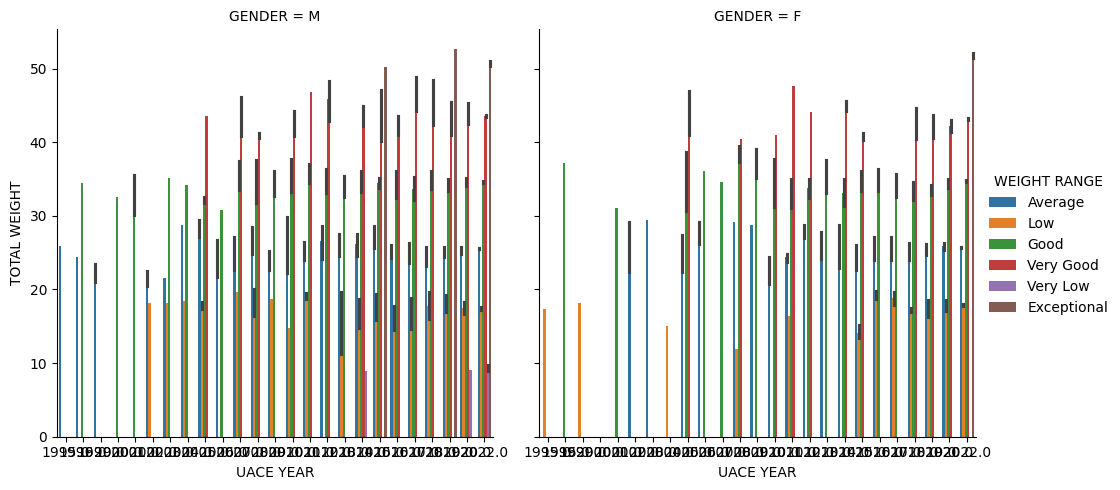

In [59]:
# Improve plot 
sns.catplot(x="UACE YEAR",
            y="TOTAL WEIGHT",
            hue="WEIGHT RANGE",
            col="GENDER",
            kind="bar",
            data=df,
            # rot=90,
           );

In [60]:
# Programs
programs = df['TOTAL WEIGHT'].groupby(df['COURSE NAME'], observed=True).agg(['count', 'mean', 'min', 'max']).sort_values(by='mean', ascending=False)

In [61]:
programs.head()['count']

COURSE NAME
B.Architecture                                 4
BSC.(Civil Engineering)A                      11
BACHELOR OF SOCIAL WORK                       18
BSC (Electrical Engineering)                  24
Bachelor of Medicine & Bachelor of Surgery    18
Name: count, dtype: int64

In [62]:
# Reindexing by Program
df[df['NAME'] == 'LUKABWE DOUGLAS MARK']

,APPLICATION NO,SCHOOL INDEX,INDEX NO,NAME,GENDER,UACE YEAR,CODE,DISTRICT,COURSE CODE,COURSE NAME,TOTAL WEIGHT,WEIGHT RANGE,SCHOOL
0,23APF412304454141015,U0391,U0391/673,LUKABWE DOUGLAS MARK,M,2022.0,42.0,MUKONO,ACC,BSC. Accounting (EVE),42.2,Very Good,"ST.JOSEPH'S S S, NAGGALAMA"


In [63]:
# Pivoting on Application number

In [64]:
# Average weight per course
AvgProgramWeight = df.groupby("COURSE CODE")['TOTAL WEIGHT'].mean()

<h1>Visualization</h1>
<p>Objectives for data visualization</p>
<ul>
    <li>Graphical representation of statistics</li>
    <li>Identify outliers, patterns, trends in the complex and large dataset</li>
    <li>Achieve Interactive data exploration</li>
    <li>Construct an compelling storyline</li>
    <li>Improve accessiblity to data analytics</li>
</ul>

In [65]:
weights = df['TOTAL WEIGHT'].sort_values(ascending=True)

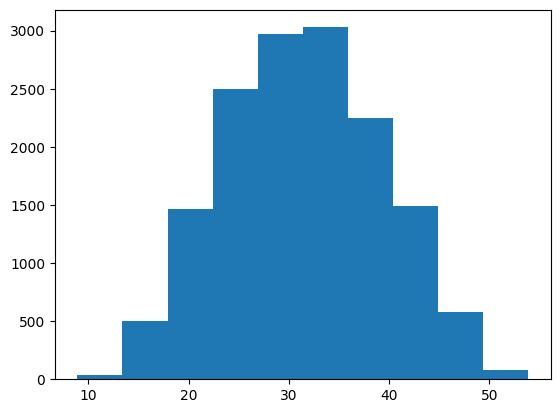

In [66]:
import matplotlib.pyplot as plt
# fig = plt.figure()
# ax1 = fig.add_subplot(2, 2, 1)
# ax2 = fig.add_subplot(2, 2, 2)
# ax3 = fig.add_subplot(2, 2, 3)
plt.hist(weights,
         # color="black",
         linestyle="dashed"
       );

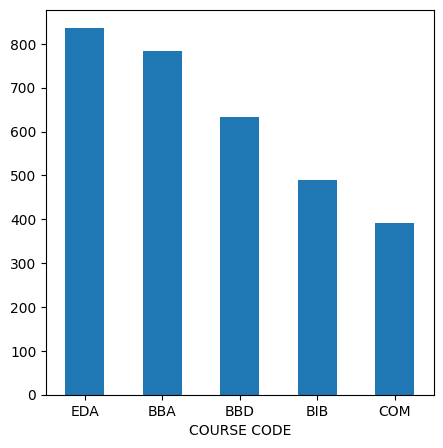

In [67]:
# Admissions per program count
df['COURSE CODE'].value_counts().head().plot.bar(
    figsize=(5,5),
    rot=0,
    # xlim=[0, 500],
);

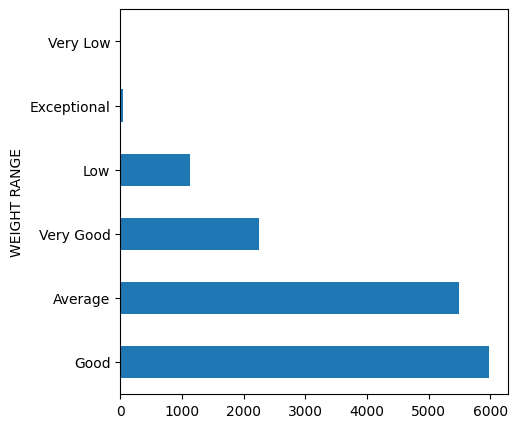

In [68]:
# Plot by Weight Range
rangeCounts = df['WEIGHT RANGE'].value_counts()
rangeCounts.plot.barh(
    figsize=(5, 5),
);

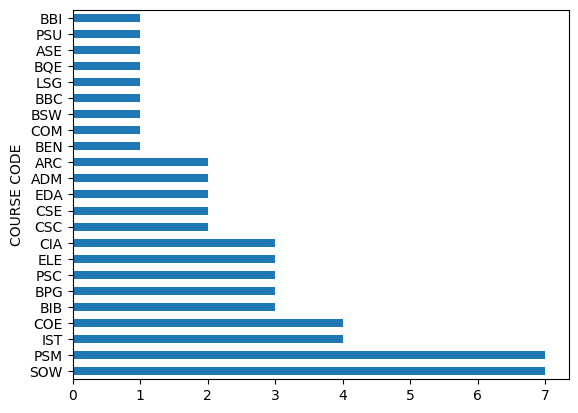

In [69]:
df[df['TOTAL WEIGHT'] >= 50]['COURSE CODE'].value_counts().plot.barh();

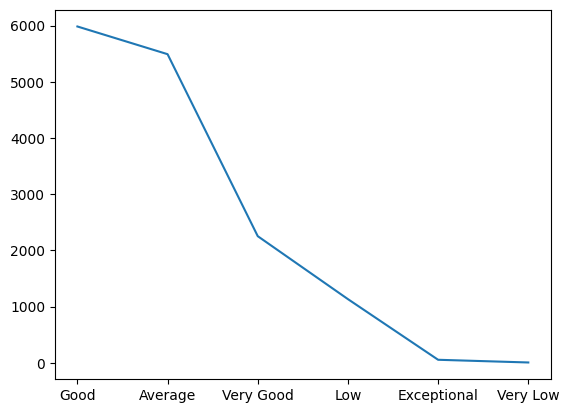

In [70]:
# lineplots are not suitable for variable comparions.
# They are best for trend analysis over a period of time.
fig, ax = plt.subplots()
ax.plot(rangeCounts,
       );

In [71]:
# Plot program statistics
# Plot by college programs
# Program admission counts
df['COURSE CODE'].value_counts()
# programs.head().plot.bar(),

COURSE CODE
EDA    836
BBA    783
BBD    633
BIB    490
COM    392
      ... 
BUE      3
BMR      3
DPA      3
BDT      3
HMA      3
Name: count, Length: 154, dtype: int64

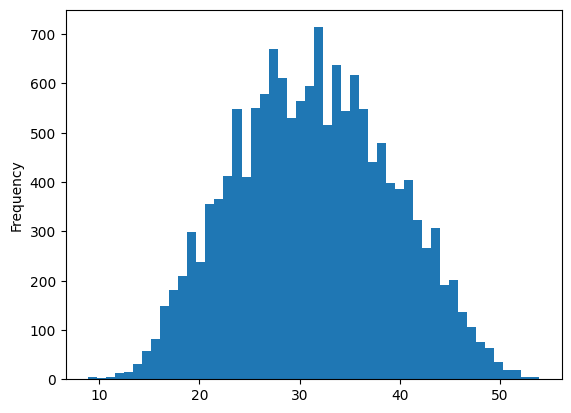

In [72]:
# Weight distribution
df['TOTAL WEIGHT'].plot.hist(bins=50,
                            );

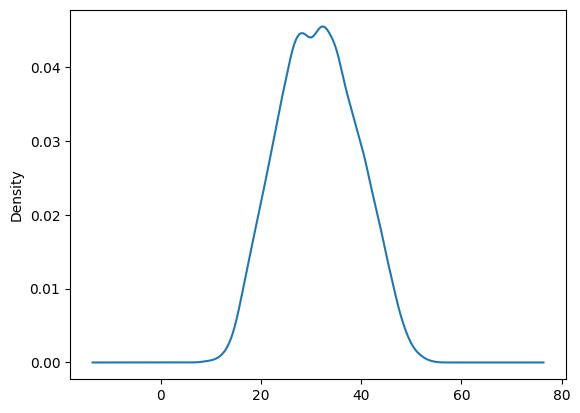

In [73]:
# kde plot
df['TOTAL WEIGHT'].plot.density(
);

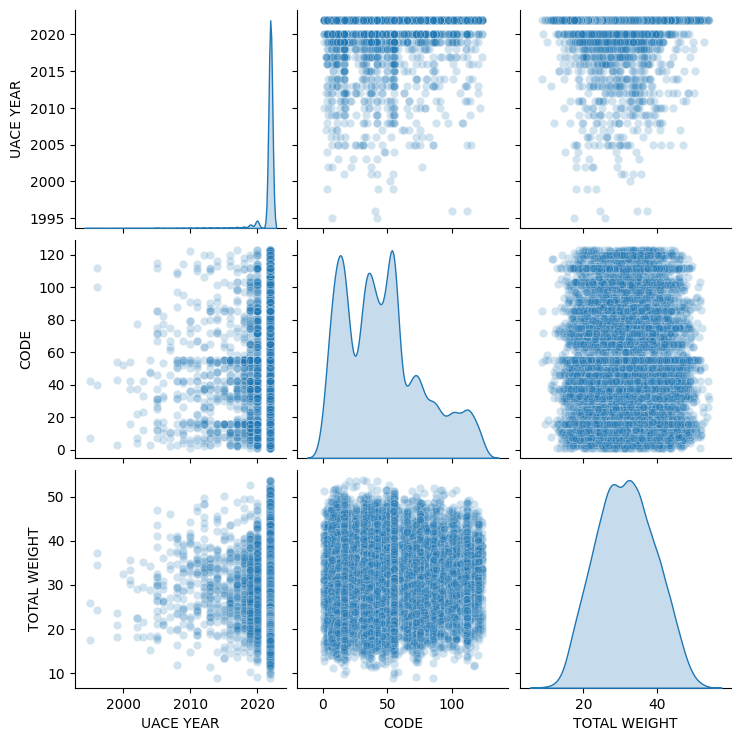

In [74]:
# pairplot
# These plots are to be intepreted with text or simpler plots
sns.pairplot(df,
             diag_kind='kde',
             plot_kws={"alpha": 0.2},
            );

In [75]:
# Group by course code
df.groupby(["COURSE CODE"])["TOTAL WEIGHT"].agg(["mean", "std", "min", "max", "count"]).sort_values(by="mean", ascending=False).head(20)

,mean,std,min,max,count
COURSE CODE,,,,,
ARC,50.325000,0.928709,49.5,51.6,4
CIA,49.263636,2.147684,46.1,52.7,11
SOW,49.138889,2.075385,46.7,53.9,18
ELE,47.970833,1.473676,45.7,50.7,24
MAM,47.605556,1.406068,45.9,49.9,18
SQA,47.066667,1.569289,45.2,49.0,6
BDS,46.685714,0.134519,46.5,46.8,7
SQS,46.682857,1.283947,45.1,49.1,35
PHA,46.080000,0.716340,45.3,46.8,15


In [76]:
# Exceptionals
# Which program has many averages, lows, exceptionals, good, or very good?
# How does this influence overall program performance?
veryGood = df[df['WEIGHT RANGE'] == 'Very Good'].groupby(["COURSE CODE", "WEIGHT RANGE"])["WEIGHT RANGE"].value_counts()

In [77]:
veryGood

COURSE CODE  WEIGHT RANGE
ACC          Very Good        3
ADJ          Very Good        3
ADM          Very Good       93
ADN          Very Good       14
AGE          Very Good       17
                             ..
SQS          Very Good       35
SSE          Very Good       44
TLM          Very Good        7
TTM          Very Good        4
VET          Very Good       20
Name: count, Length: 133, dtype: int64

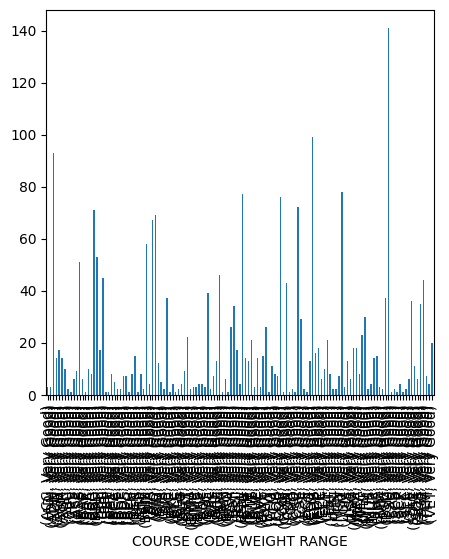

In [78]:
# Exceptional distribution per program
veryGood.plot(figsize=(5, 5),
                  rot=90,
                  kind="bar",
                  x="COURSE CODE",
                 );

In [79]:
# Top N per program
def topN(df,n=5):
    return df.sort_values(by="TOTAL WEIGHT",
                          ascending=False)[:n]

In [80]:
df.groupby(["COURSE CODE"]).apply(topN,
                                  n=7,
                                 include_groups=False,
                                 ).head(60)

APPLICATION NO SCHOOL INDEX   INDEX NO  \
COURSE CODE                                                      
ACC         0     23APF412304454141015        U0391  U0391/673   
            1     23APF345674424112360        U1249  U1249/532   
            2    23APF1361730063122187        U0459  U0459/676   
            3     23APF519647933132646        U1611  U1611/887   
            4    23APF1481620160129238        U0083  U0083/555   
            5    23APF1501202078128326        U2373  U2373/501   
            6    23APF1139056282132364        U0856  U0856/511   
ADJ         148   23APF161477980127627        U0857  U0857/653   
            149  23APF1204513446146356        U1609  U1609/545   
            150   23APF688643910133612        U1224  U1224/616   
            151  23APF1168138599150703        U0763  U0763/674   
            152   23APF538553468129033        U2929  U2929/610   
            153  23APF1387513733128240        U0198  U0198/537   
            154   23APF393781415140581        U2016  U2016/504   
ADM         178  23APF1151679609140229        U2929  U2929/517   
            179   23APF364716610133620        U3297  U3297/560   
            180   23APF578322034125667        U0060  U0060/527   
            181  23APF1473406434111376        U0013  U0013/551   
            182   23APF755418932138919        U0752  U0752/505   
            183   23APF257886745142336        U0959  U0959/503   
            184  23APF1187018402140623        U0030  U0030/574   
ADN         345  23APF1300717245138519        U0083  U0083/514   
            346   23APF127703506113533        U0857  U0857/686   
            347   23APF808470371145649        U0959  U0959/564   
            348   23APF847791420147974        U1224  U1224/759   
            349  23APF1167922299149603        U3413  U3413/524   
            350   23APF322793328143187        U0691  U0691/511   
            351  23APF1461262689122343        U1336  U1336/512   
AGE         517   23APF331366071132279        U0781  U0781/580   
            518   23APF729202977143948        U1085  U1085/530   
            519   23APF863992305102994        U2032  U2032/582   
            520  23APF1663594660149875        U0059  U0059/547   
            521   23APF308013076109627        U0763  U0763/619   
            522  23APF1159804793138526        U1350  U1350/541   
            523  23APF1259482602100713        U1223  U1223/705   
AGM         542   23APF505525481135891        U1224  U1224/701   
            543  23APF1511898912137673        U3740  U3740/550   
            544   23APF778169252145769        U3409  U3409/508   
            545  23APF1144326577133238        U0169  U0169/599   
            546  23APF1616700524139262        U2860  U2860/509   
            547  23APF1194451777139361        U1156  U1156/502   
            548   23APF827641749147723        U1148  U1148/567   
AGR         621  23APF1356018260112607        U0801  U0801/508   
            622   23APF619604564119543        U0065  U0065/595   
            623    23APF72852637122180        U2876  U2876/505   
            624  23APF1596835425141118        U0801  U0801/585   
            625   23APF428727676143759        U1297  U1297/506   
            626   23APF881066405114179        U0334  U0334/612   
            627  23APF1490115323114106        U0334  U0334/614   
AML         661   23APF557463582125646        U0038  U0038/527   
            662   23APF971650663139159        U0417  U0417/528   
            663  23APF1460687305130518        U0742  U0742/732   
            664   23APF290755285117363        U0051  U0051/787   
            665   23APF619025651149175        U0589  U0589/513   
ARC         666   23APF190708609129862        U0013  U0013/603   
            667    23APF84548033130048        U2032  U2032/551   
            668  23APF1319062739121723        U0004  U0004/597   
            669  23APF1639854787144248        U0004  U0004/590   
ARJ         670   23APF296651384148846        U2962  U2962/573  

In [81]:
# Groupby Gender and get frame descriptions
df.groupby("GENDER")["TOTAL WEIGHT"].describe()

,count,mean,std,min,25%,50%,75%,max
GENDER,,,,,,,,
F,8185.0,31.686487,7.581327,10.2,26.1,31.7,37.2,53.9
M,6730.0,31.054889,8.089288,8.9,25.1,30.9,37.0,52.7


In [82]:
# Description per program grouped by sex, Course Code
df.groupby(["COURSE CODE", "GENDER"])["TOTAL WEIGHT"].describe()

count       mean       std   min     25%    50%     75%  \
COURSE CODE GENDER                                                            
ACC         F        62.0  26.738710  6.361445  16.0  21.825  25.85  31.375   
            M        86.0  27.296512  5.784573  15.7  23.800  27.20  30.975   
ADJ         F        19.0  30.152632  8.202802  19.4  23.800  28.00  35.050   
            M        11.0  25.809091  7.915359  14.3  21.700  25.30  26.700   
ADM         F       127.0  41.036220  2.385161  38.4  39.200  40.50  42.600   
...                   ...        ...       ...   ...     ...    ...     ...   
TLM         M       182.0  25.942857  6.078613  14.3  21.525  25.30  30.275   
TTM         F       120.0  25.822500  5.669133  17.3  21.600  23.90  29.900   
            M        76.0  25.864474  6.517253  17.6  20.075  24.85  30.200   
VET         F         8.0  42.062500  1.637016  40.1  41.300  41.85  42.625   
            M        12.0  43.583333  0.959956  41.7  43.550  43.70  43.825   

                     max  
COURSE CODE GENDER        
ACC         F       40.6  
            M       42.2  
ADJ         F       47.2  
            M       41.4  
ADM         F       50.1  
...                  ...  
TLM         M       45.2  
TTM         F       43.3  
            M       44.3  
VET         F       45.4  
            M       45.0  

[304 rows x 8 columns]

In [83]:
# QUARTILE ANALYSIS
def get_stats(group):
    return pd.DataFrame(
        {
            "min": group.min(),
         "max": group.max(),
         "count": group.count(),
         "mean": group.mean()
        }
    )

In [84]:
# quartiles
quartiles = pd.cut(df['TOTAL WEIGHT'],
                   4)

In [85]:
quartiles

0        (31.4, 42.65]
1        (31.4, 42.65]
2        (31.4, 42.65]
3        (31.4, 42.65]
4        (31.4, 42.65]
             ...      
14910    (31.4, 42.65]
14911    (31.4, 42.65]
14912    (31.4, 42.65]
14913    (31.4, 42.65]
14914    (31.4, 42.65]
Name: TOTAL WEIGHT, Length: 14915, dtype: category
Categories (4, interval[float64, right]): [(8.855, 20.15] < (20.15, 31.4] < (31.4, 42.65] < (42.65, 53.9]]

In [86]:
grouped = df[['TOTAL WEIGHT']].groupby(quartiles,
                    observed=False,
                    )
grouped.apply(get_stats,
             )

,,min,max,count,mean
TOTAL WEIGHT,,,,,
"(8.855, 20.15]",TOTAL WEIGHT,8.9,20.1,1160,17.641293
"(20.15, 31.4]",TOTAL WEIGHT,20.2,31.4,6380,26.372179
"(31.4, 42.65]",TOTAL WEIGHT,31.5,42.6,6101,36.348959
"(42.65, 53.9]",TOTAL WEIGHT,42.7,53.9,1274,45.423783


In [87]:
# crosstab
pd.crosstab(df['COURSE CODE'],
            df['WEIGHT RANGE'],
            margins=True,
           ).sort_values(
    by="Exceptional",
    ascending=False,
)

WEIGHT RANGE,Average,Exceptional,Good,Low,Very Good,Very Low,All
COURSE CODE,,,,,,,
All,5490,53,5983,1132,2252,5,14915
SOW,0,7,0,0,11,0,18
PSM,0,7,183,0,141,0,331
COE,0,4,93,0,76,0,173
IST,0,4,96,0,78,0,178
...,...,...,...,...,...,...,...
BLM,55,0,30,18,9,0,112
BLT,0,0,10,0,22,0,32
BMA,25,0,17,8,2,0,52


In [112]:
# More Visualizations

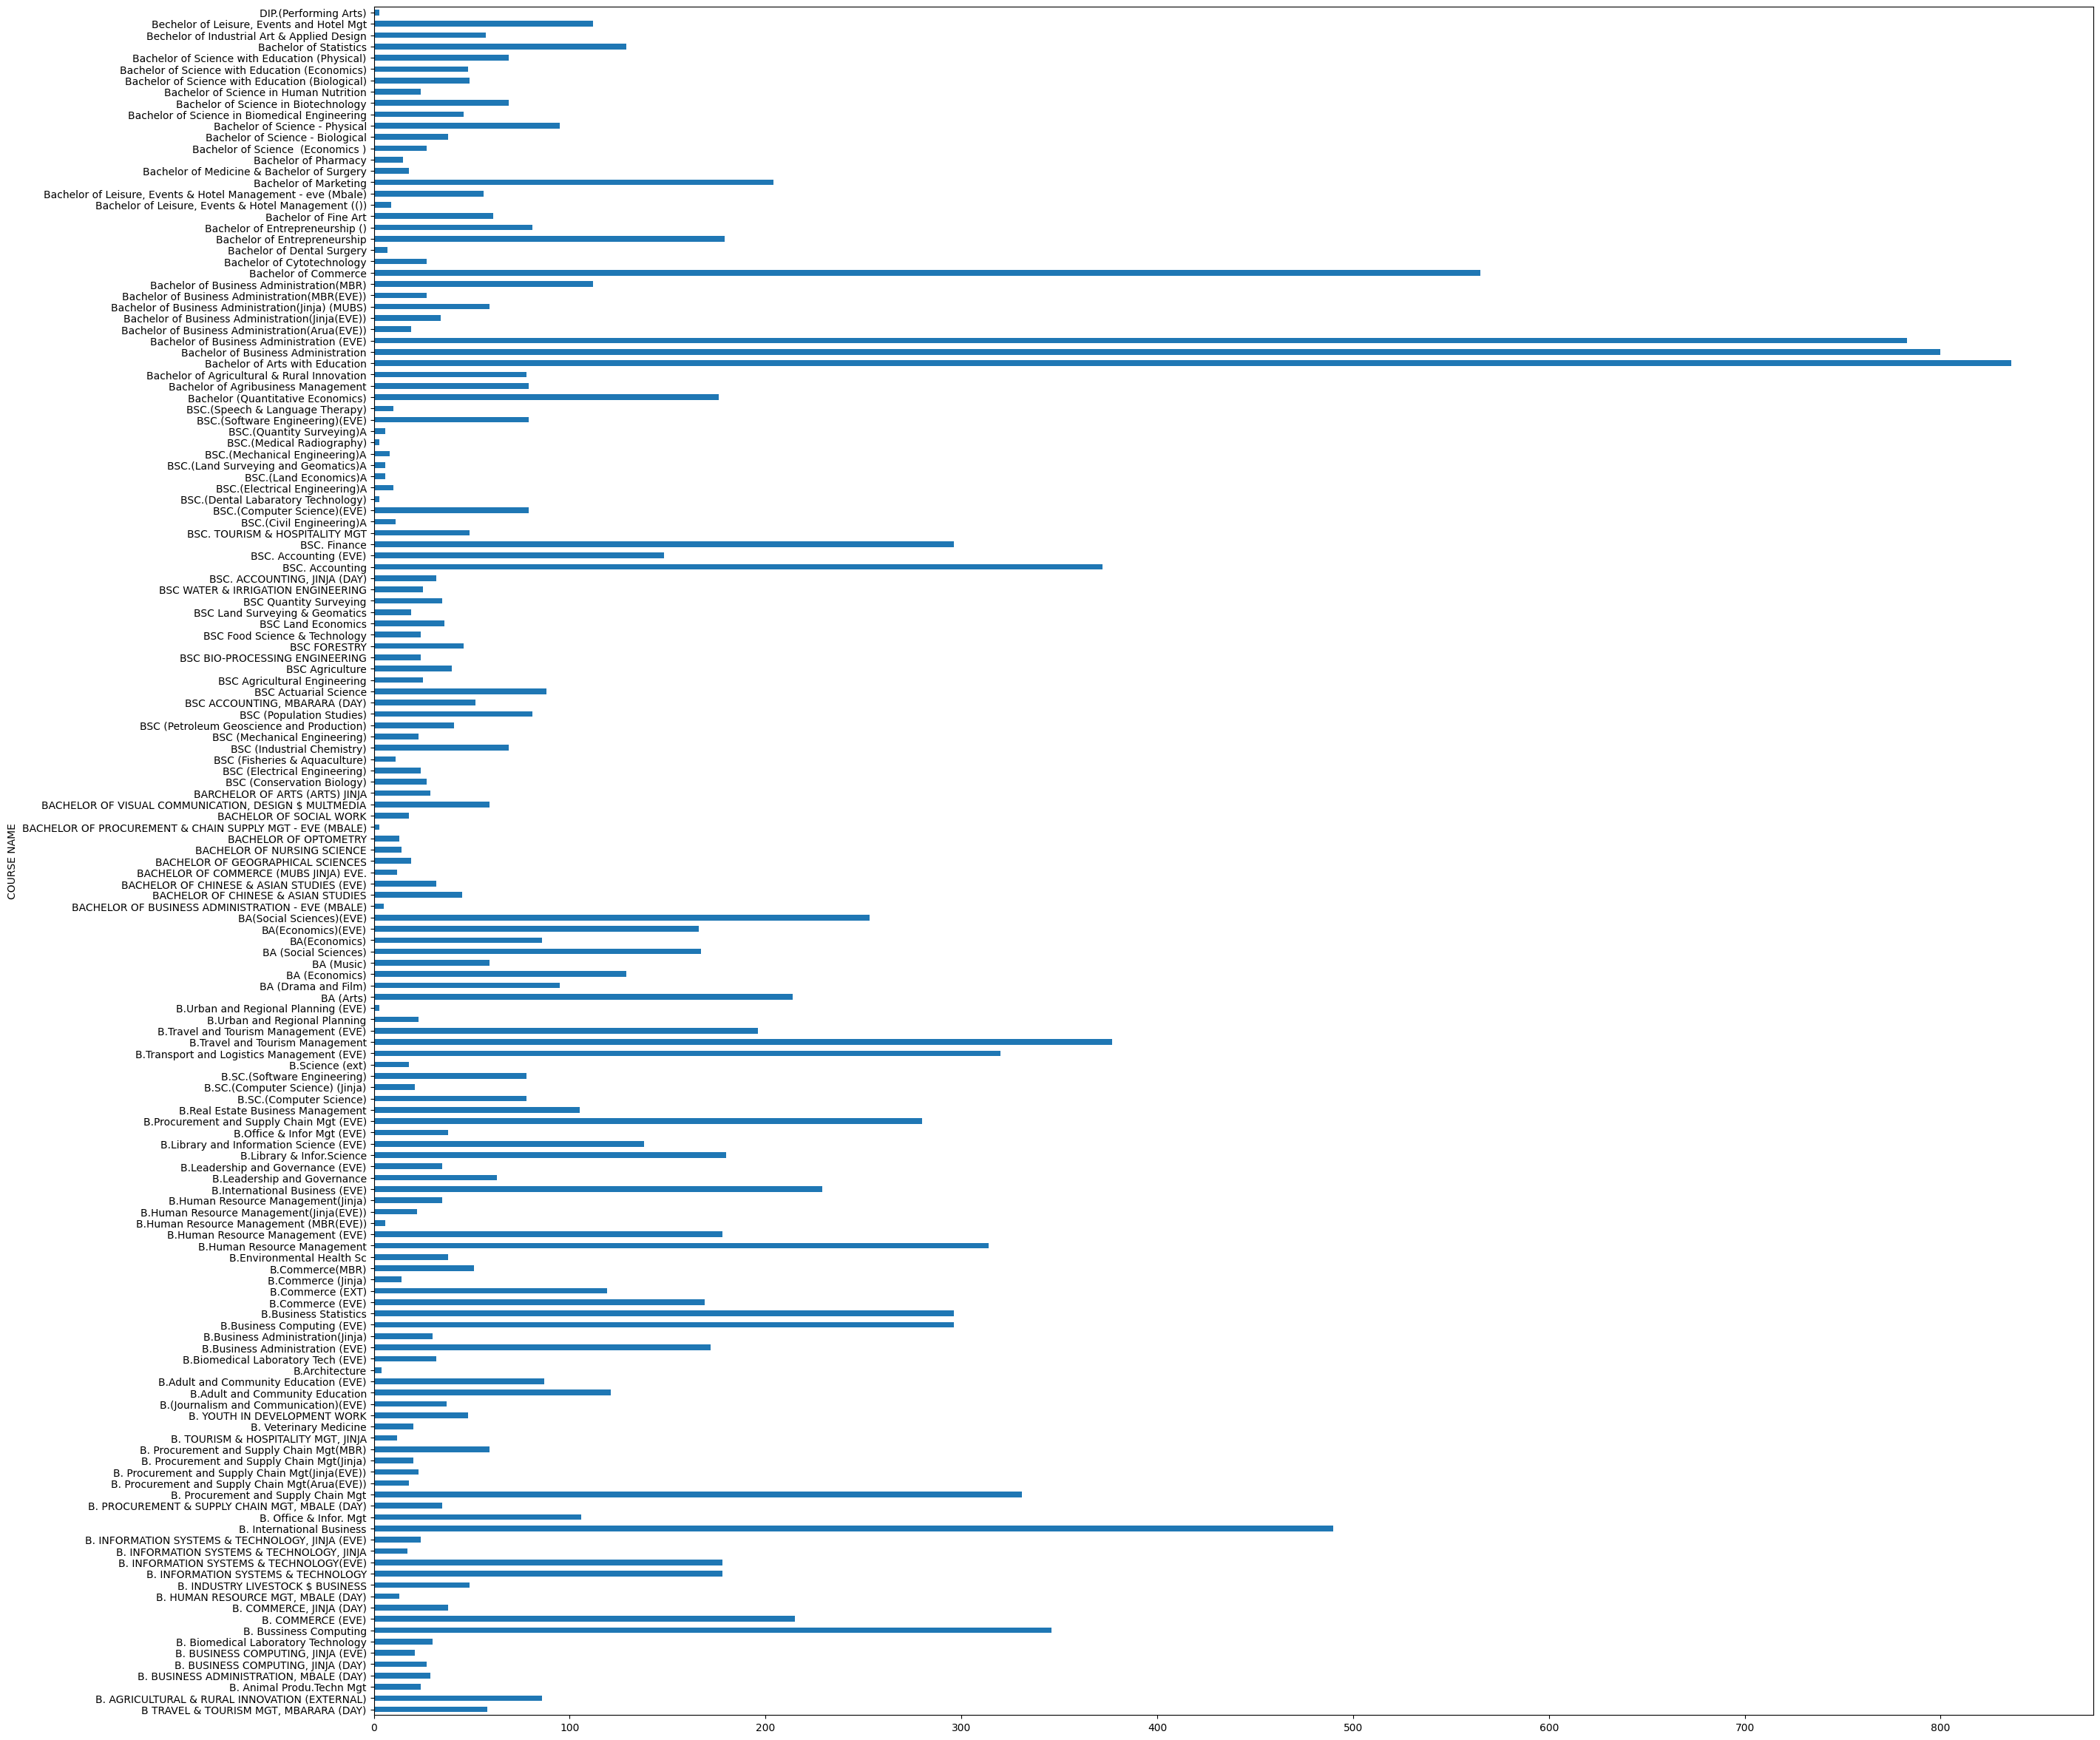

In [123]:
plt.figure(figsize=(30, 30));
# plt.xscale('log');
df.groupby(['COURSE NAME'])['COURSE NAME'].count().plot.barh(width=0.5);

<Axes: ylabel='COURSE NAME'>

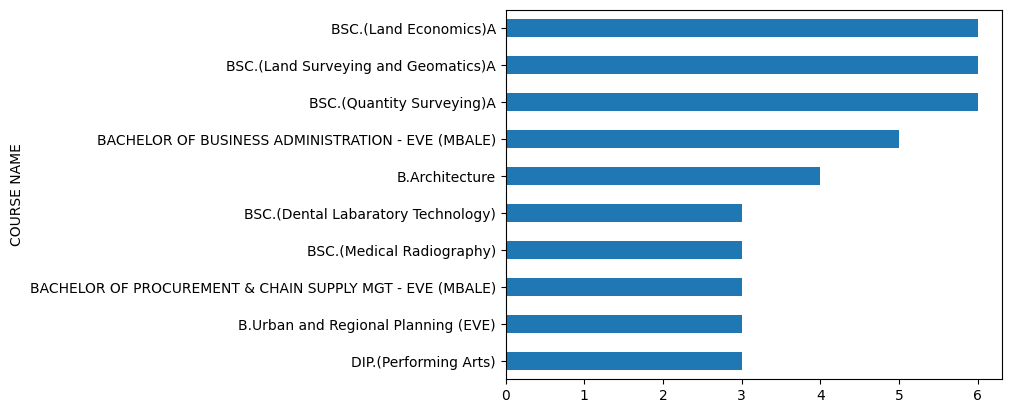

In [134]:
# Courses with least admitted students
(df.groupby(['COURSE NAME'])['COURSE NAME'].count()
).sort_values(
    
).head(
    10).plot.barh()

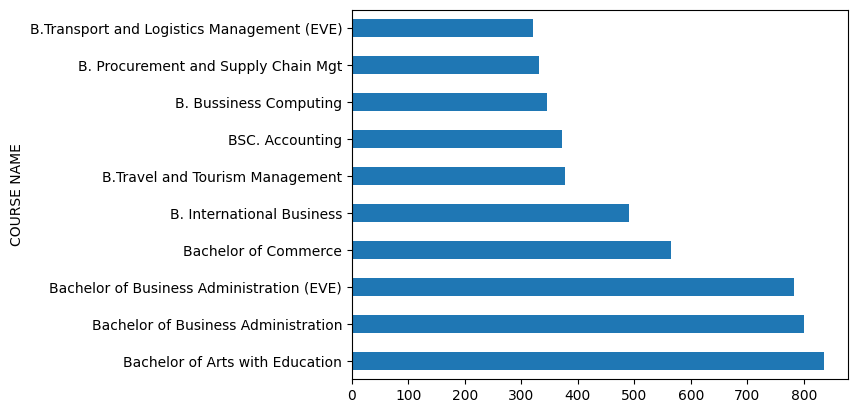

In [141]:
# Courses with most admitted students
# plt.xscale('log');
(df.groupby(['COURSE NAME'])['COURSE NAME'].count()
).sort_values(ascending=False
    
).head(
    10).plot.barh();